In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
plt.rcParams['figure.dpi'] = 100

# Duffing Oscillator Bifurcation

In this notebook, we will look a bit at the bifurcation of the Duffing oscillator. We will do this using the "slowly varying envelope approximation", equivalent to the RWA. We will follow this reference:

The bifurcations of duffing's equation: An application of catastrophe theory <br>
P.J.Holmes, D.A.Rand <br>
Journal of Sound and Vibration <br>
Volume 44, Issue 2, 22 January 1976, Pages 237-253 <br>
Journal of Sound and Vibration <br>
https://doi.org/10.1016/0022-460X(76)90771-9

We will parametrise the equation as:

$$
\ddot x + 2 \zeta \dot x + x + \alpha x^3 = \phi \cos \Omega t 
$$

In this form, the natural frequency $\omega_0 = 1$. 

We will consider motion of the oscillator: 

$$
x(t) = A(\Omega) \cos(\Omega t + \theta)
$$

We can derive the solutions for the amplitude by finding the roots of a characteristic polynomial. Defining a variable $y(\Omega) = (A(\omega))^2$ representing the square amplitude, Holmes shows that the value of $y$ is determined by the roots of the following polynomial:

$$
 9 \alpha^2 y^3 + 24 \alpha \rho y^2 + 16(\rho^2+\sigma^2)y - 16 \phi^2 = 0
$$

where  $\rho = 1 - \Omega^2$ and $\sigma = 2 \zeta \Omega$. We can then also calculate the phase $\theta$ using:

$$
\theta =  \arcsin(-\sigma A /\phi)
$$

In this notebook, we will find, plot, and explore the solutions of this as a function of driving frequency and force. 

For this, we will use the `roots()` function from numpy:

https://numpy.org/doc/stable/reference/generated/numpy.roots

In [42]:
def find_amp_phase(Omega, phi, Q = 100, alpha = 1):
    zeta = 0.5/Q
    rho = 1-Omega**2
    sigma = 2*zeta*Omega
    p = np.zeros(4)
    p[0] = 9*alpha**2
    p[1] = 24*alpha*rho
    p[2] = 16*(rho**2+sigma**2)
    p[3] = -16*phi**2
    y_roots = np.roots(p)
    A = np.sqrt(y_roots)
    theta = np.arcsin(-sigma*A/phi)
    return A,theta

Quick test: 

In [43]:
Omega = 1
phi = 1
find_amp_phase(Omega,phi,100,0)

(array([100.]), array([-1.57079633]))

## Check with linear HO ($\alpha = 0$)

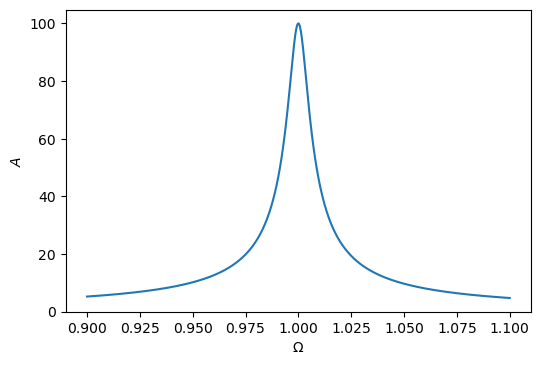

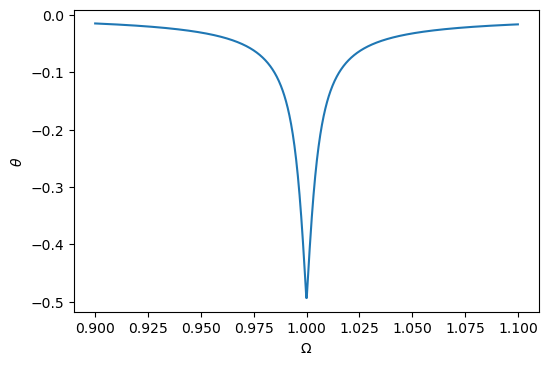

In [44]:
phi = 1
Omega = np.linspace(0.9,1.1,1000)
Q = 100
alpha = 0

A = []
theta = []
for O in Omega:
    a,t = find_amp_phase(O,phi,Q,alpha)
    A.append(a)
    theta.append(t)
A = np.array(A)
theta = np.array(theta)
plt.plot(Omega,A)
plt.xlabel("$\Omega$")
plt.ylabel("$A$")
plt.show()
plt.plot(Omega,theta/np.pi)
plt.xlabel("$\Omega$")
plt.ylabel(r"$\theta$")
plt.show()

Hmmm...the second plot does not look quite right? Not sure, it seems to match the Holmes and Rand formula? But above the resonance frequency, the phase should asymptote to $-\pi$? 

## Check with alpha = 1e-3, phi = tiny

This should also reduce to the linear HO

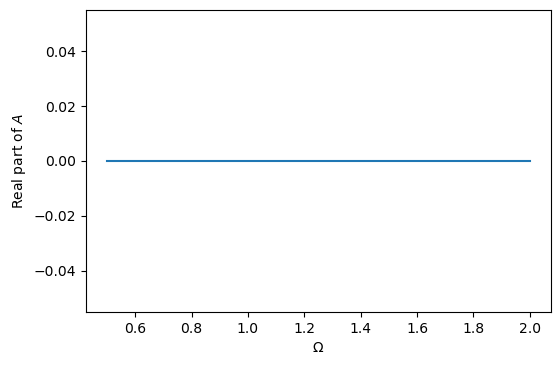

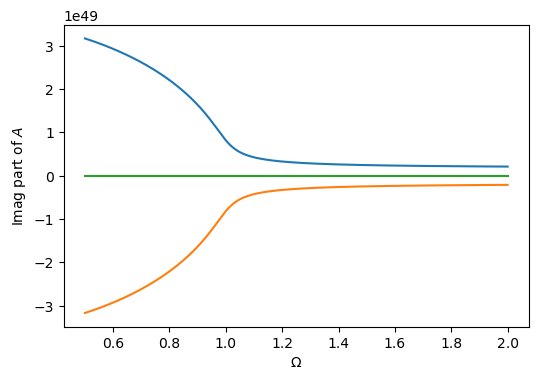

In [45]:
phi = 1e-9
Omega = np.linspace(0.5,2,1000)
alpha = 1e-99
Q = 10

A = []
theta = []
for O in Omega:
    a,t = find_amp_phase(O,phi,Q,alpha)
    A.append(a)
    theta.append(t)
A = np.array(A)
theta = np.array(theta)
plt.plot(Omega,np.real(A[:,2]))
plt.xlabel("$\Omega$")
plt.ylabel("Real part of $A$")
plt.show()
plt.plot(Omega,np.imag(A))
plt.xlabel("$\Omega$")
plt.ylabel("Imag part of $A$")
plt.show()

OK, this is giving nonsense! Let's debug by looking at the polynomial. First, alpha = 0:

In [46]:
def plot_poly():
    zeta = 0.5/Q
    rho = 1-Omega**2
    sigma = 2*zeta*Omega
    p = np.zeros(4)
    p[0] = 9*alpha**2
    p[1] = 24*alpha*rho
    p[2] = 16*(rho**2+sigma**2)
    p[3] = -16*phi**2
    poly = p[0]*y**3 + p[1]*y**2 + p[2]*y + p[3]
    plt.plot(y,np.abs(poly))
    plt.axhline(0,ls=":", c='grey')
    plt.xscale('log')
    plt.yscale('log')

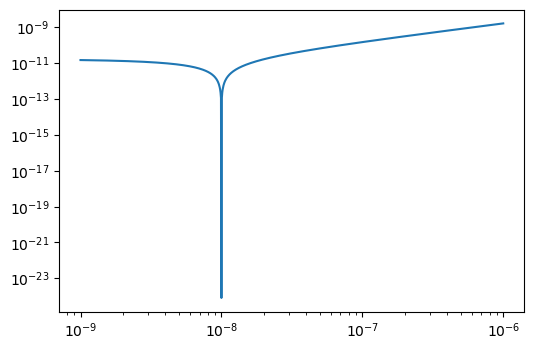

In [47]:
Q = 100
alpha = 0.3
phi = 1e-6
Omega = 1

y = np.geomspace(1e-9,1e-6,1000)
plot_poly()

OK, this seems reasonable? Let's check amplitude and phase. 

In [48]:
find_amp_phase(Omega,phi,Q,alpha)

(array([1.4907119e-01+0.14907121j, 1.4907119e-01-0.14907121j,
        1.0000000e-04+0.j        ]),
 array([-0.78539805-8.3467299j, -0.78539805+8.3467299j,
        -1.5707961 +0.j       ]))

OK, there seems to be some kind of numerical error when when alpha is small or phi is small. 

OK, found it. I needed to decrease phi. 

In [49]:
from ipywidgets import interact

phi_ind = np.geomspace(1e-4,1e-1,20)

def update_plot(n=0):
    phi = phi_ind[n]
    Omega = np.linspace(0.8,1.2,1000)
    alpha = -0.1
    Q = 100
    A = []
    theta = []
    for O in Omega:
        a,t = find_amp_phase(O,phi,Q,alpha)
        A.append(a)
        theta.append(t)
    A = np.array(A)
    theta = np.array(theta)
    plt.subplots(figsize=(15,4))
    plt.subplot(121)
    for i in range(3):
        plt.plot(Omega,np.real(A[:,i]))
    plt.xlabel("$\Omega$")
    plt.ylabel("Real part of $A$")
    plt.yscale('log')
    plt.axhline(0.2,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.subplot(122)
    plt.plot(Omega,np.imag(A))
    plt.xlabel("$\Omega$")
    plt.ylabel("Imag part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.show()

interact(update_plot, n = (0,len(phi_ind)-1,1))

interactive(children=(IntSlider(value=0, description='n', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.update_plot(n=0)>

In [50]:
from ipywidgets import interact

phi_ind = np.geomspace(1e-4,1e-1,20)

def update_plot(n=0):
    phi = phi_ind[n]
    Omega = np.linspace(0.9,1.1,1000)
    alpha = -0.1
    Q = 100
    A = []
    theta = []
    for O in Omega:
        a,t = find_amp_phase(O,phi,Q,alpha)
        A.append(a)
        theta.append(t)
    A = np.array(A)
    theta = np.array(theta)
    plt.subplots(figsize=(15,4))
    plt.subplot(121)
    for i in range(3):
        index = np.where(np.imag(A[:,i]) == 0)
        if len(index[0]) > 1:
            plt.plot(Omega[index],np.real(A[index,i][0,:]))
    plt.xlabel("$\Omega$")
    plt.ylim(0,2)
    plt.ylabel("Real part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axhline(0.35,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.subplot(122)
    plt.plot(Omega,np.imag(A))
    plt.xlabel("$\Omega$")
    plt.ylabel("Imag part of $A$")
    plt.axhline(0,ls=":",c="grey")
    plt.axvline(1,ls=":",c="grey")
    plt.show()

interact(update_plot, n = (0,len(phi_ind)-1,1))

interactive(children=(IntSlider(value=0, description='n', max=19), Output()), _dom_classes=('widget-interact',…

<function __main__.update_plot(n=0)>

## A frequency sweep

With code that also picks out "valid" solutions based on if they have zero imaginary component

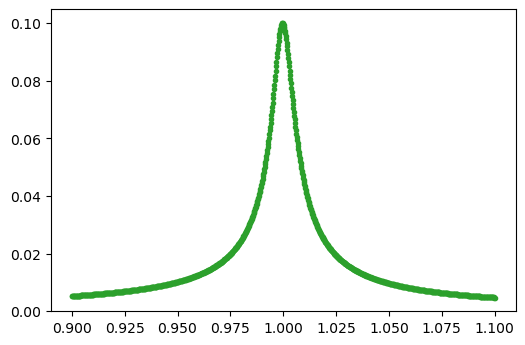

In [51]:

def plot_response():
    Omega = np.linspace(0.9,1.1,1001)
    alpha = -0.1
    Q = 100
    A = []
    theta = []
    for O in Omega:
        a,t = find_amp_phase(O,phi,Q,alpha)
        A.append(a)

    A = np.array(A)

    for i in range(3):
        ind = np.nonzero(np.imag(A[:,i]) == 0)
        x = Omega[ind]
        y = np.real(A[ind,i])[0,:]
        plt.plot(x,y, '.')

phi = 1e-3
plot_response()

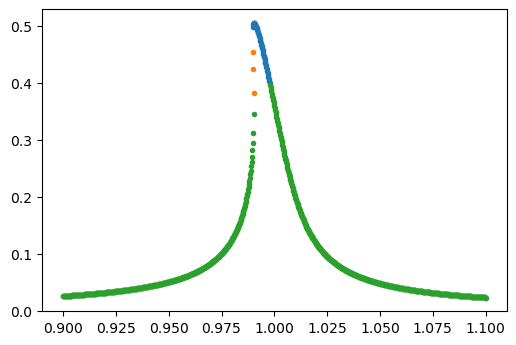

In [52]:
phi = 5e-3
plot_response()

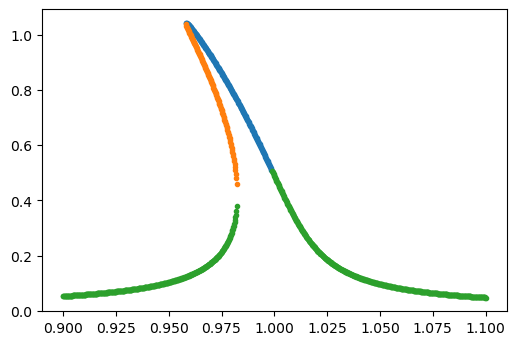

In [53]:
phi = 10e-3
plot_response()

## Exploring bifurcation phase space with a force sweep

Text(0, 0.5, '$\\phi$')

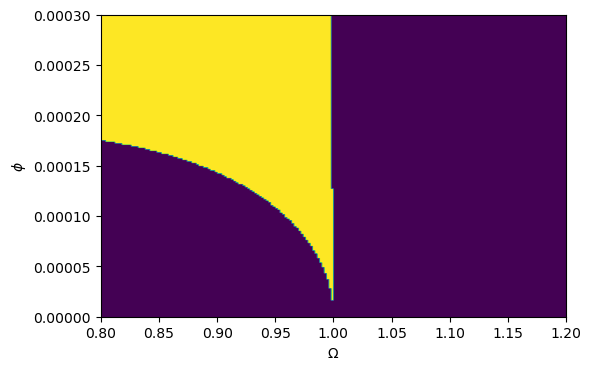

In [54]:
Nphi = 200 # i
NOmega = 200 # j

phi_max = 3e-4
phis = np.linspace(0,phi_max,Nphi)
d = 0.2
Omegas = np.linspace(1-d,1+d,NOmega)
Q = 1e4
alpha = -0.1

A = np.zeros((Nphi,NOmega, 3))+0j

# to avoid numerical issues at zero phi
eps=np.max(phis)*1e-10

for i in range(Nphi):
    for j in range(NOmega):
        phi = phis[i]
        Omega = Omegas[j]
        a,_ = find_amp_phase(Omega,phi+eps,Q,alpha) 
        A[i,j,:] = a
        

N_branches = np.sum(np.imag(A[:,:,:]) == 0, axis=2)

ext = [Omegas[0], Omegas[-1], 0, phis[-1]]
plt.imshow(N_branches, origin='lower', aspect='auto', extent = ext)
plt.xlabel("$\Omega$")
plt.ylabel("$\phi$")

Great, that is the Arnold tongue!

### Bifurcation phase diagram as a function of *field amplitude* instead of driving force

Now, let's try to plot the y-axis as amplitude instead of force! This I think will need some puzzling though. 

First, cut out any of the solutions with non-zero imaginary part by assigning them to nan:

In [55]:
ind = np.nonzero(np.imag(A))
A2 = np.copy(np.real(A))
A2[ind] = np.nan

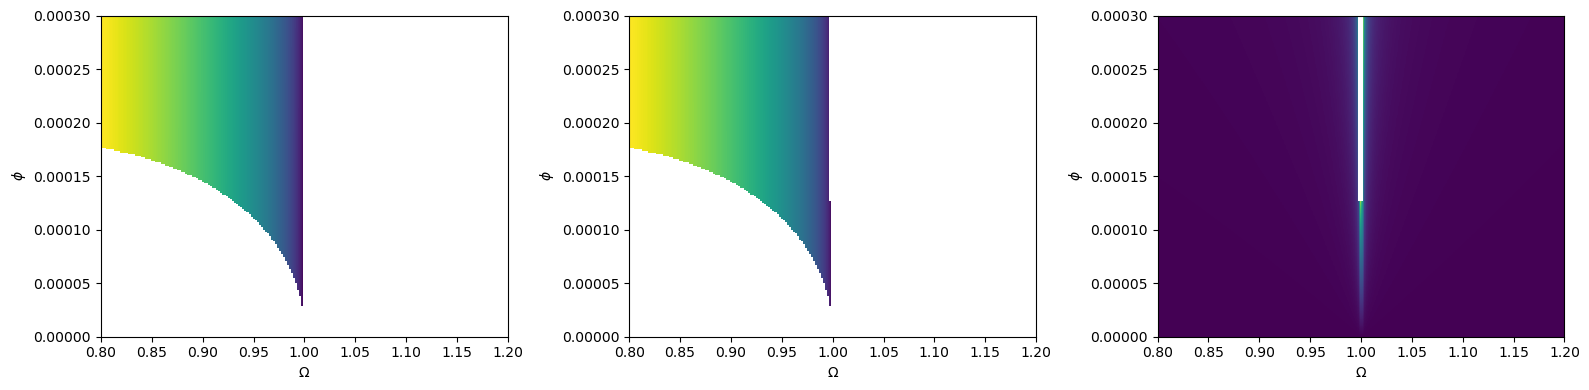

In [56]:
plt.subplots(figsize=(16,4))
for i in range(3):
    plt.subplot(131+i)
    ext = [Omegas[0], Omegas[-1], 0, phis[-1]]
    plt.imshow(A2[:,:,i],origin='lower',aspect='auto', extent=ext)
    plt.xlabel("$\Omega$")
    plt.ylabel("$\phi$")
plt.tight_layout()

OK those are our three solutions. The middle one (like above) is most likely the metastable state. 

OK, let's try using meshing to plot the Arnold tongue vs the amplitude of the low-amplitude branch (related to the low-amplitude-branch intracavity photon number if this is a cavity...)

In [58]:
A3 = np.nanmin(A2, axis=2)

(0.0001, 0.21329199182571926)

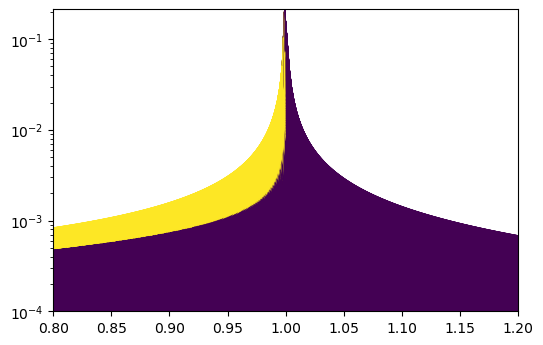

In [59]:
plt.pcolormesh(Omegas, A3, N_branches, shading='gouraud')
plt.xlabel("$\Omega")
plt.ylable("Oscillator Amplitude")
plt.yscale('log')
plt.ylim(bottom=1e-4)

Super interesting. A zoom in

(0.0, 0.004)

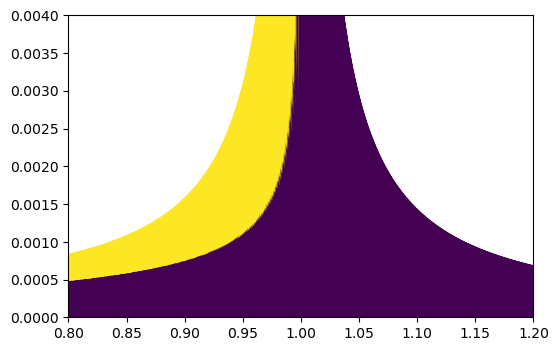

In [60]:
plt.pcolormesh(Omegas, A3, N_branches, shading='gouraud')
plt.xlabel("$\Omega")
plt.ylable("Oscillator Amplitude")
plt.ylim([0,0.004])

In [ ]:
PRetty cool, 